In [108]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


rc('font', family='Malgun Gothic')

## 1. 데이터 불러오기 및 확인하기
iris = load_iris()

# iris 데이터의 전반적인 정보 확인
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['꽃받침_길이', '꽃받침_너비', '꽃잎_길이', '꽃잎_너비'] # column 이름 재정의
df['품종_번호'] = iris.target # 품종 번호 col 추가
df['품종_번호'] = df['품종_번호'].astype('category') # '품종_번호' 열을 카테고리 데이터로 변환
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   꽃받침_길이  150 non-null    float64 
 1   꽃받침_너비  150 non-null    float64 
 2   꽃잎_길이   150 non-null    float64 
 3   꽃잎_너비   150 non-null    float64 
 4   품종_번호   150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


,꽃받침_길이,꽃받침_너비,꽃잎_길이,꽃잎_너비
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. 전처리

<Figure size 1000x800 with 0 Axes>

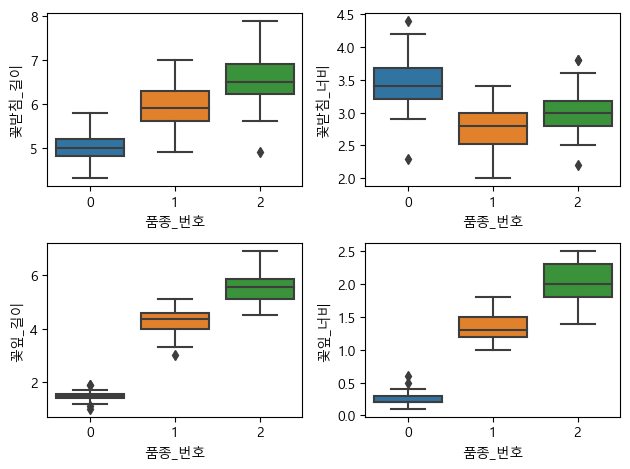

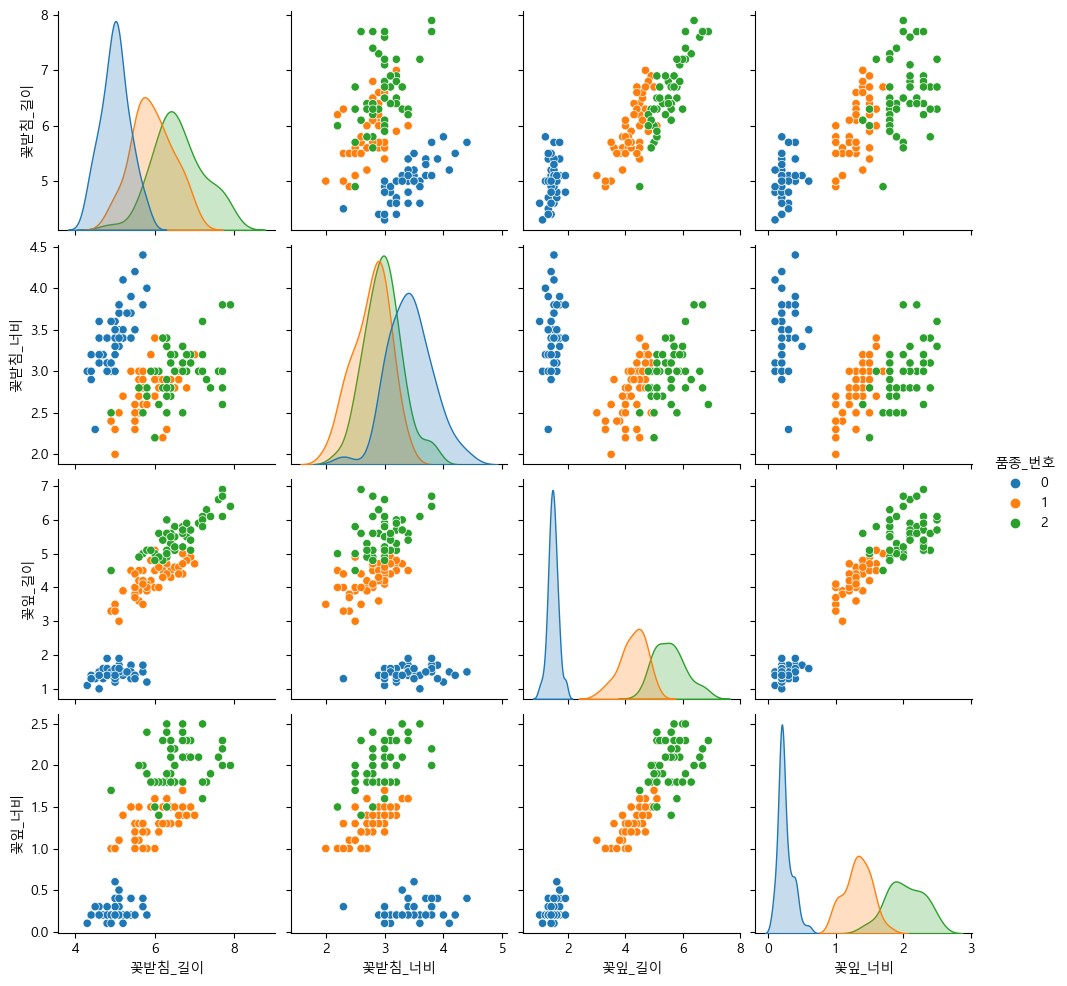

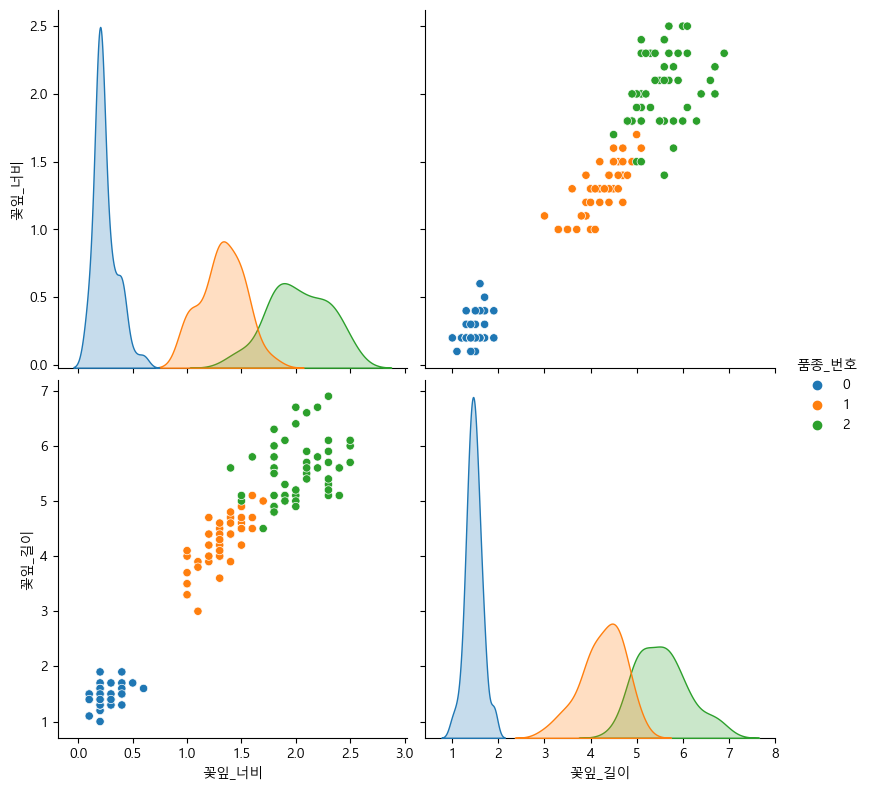

In [109]:
# 결측치 확인 및 처리
df.isnull().sum() # 결측치 존재 X

# 중복값 확인 및 처리
df.duplicated().sum() # 1개의 중복값 존재
df.loc[df.duplicated(), :] # 142번 데이터가 중복임을 확인.
df.loc[(df['꽃받침_길이'] == 5.8) & (df['꽃받침_너비'] == 2.7) & (df['꽃잎_길이'] == 5.1) & (df['꽃잎_너비'] == 1.9)] # 142번과 동일한 데이터 가진 데이터 찾기(101)
# 1개의 중복값이 존재하나 영향을 끼치지 않을 것 이기에 제거는 하지 않음.

df['품종_번호'].value_counts() # 각 50개씩 존재

# 상관 관계 분석
df.corr()

# 통계 정보 확인
df.describe()

# 이상치 확인을 위한 boxplot
plt.figure(figsize=(10, 8))
axes = plt.subplots(2,2)[1]
sn.boxplot(data=df, x='품종_번호', y='꽃받침_길이', ax=axes[0,0])
sn.boxplot(data=df, x='품종_번호', y='꽃받침_너비', ax=axes[0,1])
sn.boxplot(data=df, x='품종_번호', y='꽃잎_길이', ax=axes[1,0])
sn.boxplot(data=df, x='품종_번호', y='꽃잎_너비', ax=axes[1,1])
plt.tight_layout()
plt.show()
# 크게 벗어나는 구간이 없으므로 별도 처리는 하지 않을예정.

# 전체적으로 확인
sn.pairplot(df, hue="품종_번호")
# 꽃잎길이와 꽃잎너비
sn.pairplot(data=df, vars=["꽃잎_너비", "꽃잎_길이"], hue="품종_번호", height=4)

# 3. 머신러닝
* k-최근접 이웃 이용


In [121]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    df, df['품종_번호'], random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

# 데이터 확인 위해 추가한 col 삭제
X_train = X_train.drop('품종_번호', axis=1)
X_test = X_test.drop('품종_번호', axis=1)

iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", iris.target_names[prediction])

y_pred = knn.predict(X_test)
print(X_test[:5])
print("테스트 세트에 대한 예측값:\n", y_pred)

accuracy = np.mean(y_pred == y_test)
print("테스트 세트의 정확도: {:.5f}".format(accuracy))

classification_report_str = classification_report(y_test, y_pred)
print("분류 보고서:\n", classification_report_str)


X_train 크기: (112, 5)
y_train 크기: (112,)
X_test 크기: (38, 5)
y_test 크기: (38,)
X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']
     꽃받침_길이  꽃받침_너비  꽃잎_길이  꽃잎_너비
114     5.8     2.8    5.1    2.4
62      6.0     2.2    4.0    1.0
33      5.5     4.2    1.4    0.2
107     7.3     2.9    6.3    1.8
7       5.0     3.4    1.5    0.2
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97368
분류 보고서:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



c:\Users\wkwhs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


* 랜덤포레스트 이용

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df, df['품종_번호'], test_size=0.2, stratify=df['품종_번호'], random_state=0) # random 시드값

# 데이터 확인 위해 추가한 col삭제
X_train = X_train.drop('품종_번호', axis=1)
X_test = X_test.drop('품종_번호', axis=1)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

0.9666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 4. 결과

분류 모델 비교 보고서
1. 데이터 분석
먼저, Iris 데이터셋을 불러와서 데이터의 전반적인 정보를 확인했습니다. 데이터프레임으로 변환한 후 결측치와 중복값을 확인하고 처리하였습니다. 품종 번호를 타겟 변수로 지정하고, 변수 간의 상관 관계를 분석하였습니다. 이상치를 확인하기 위해 박스플롯과 페어플롯을 그려봤습니다.

2. K-최근접 이웃 모델
데이터를 훈련 세트와 테스트 세트로 나누고, K-최근접 이웃 분류기를 사용하여 분류 모델을 생성하였습니다. 테스트를 위해 새로운 데이터를 예측해보고, 테스트 세트에 대한 예측값과 정확도를 계산하였습니다. 또한, classification_report 함수를 사용하여 분류 보고서를 생성하였습니다.

3. 랜덤 포레스트 모델
데이터를 훈련 세트와 테스트 세트로 나누고, 랜덤 포레스트 분류기를 사용하여 분류 모델을 생성하였습니다. 테스트 세트에 대한 예측값과 정확도를 계산하였으며, classification_report 함수를 사용하여 분류 보고서를 생성하였습니다.

가설
가설: K-최근접 이웃 분류기의 정확도가 랜덤 포레스트 분류기보다 높을 것이다.
검증
데이터를 훈련 세트와 테스트 세트로 나누어 각 모델을 학습하고 예측을 수행하였습니다.
K-최근접 이웃 분류기의 정확도: 0.97368
랜덤 포레스트 분류기의 정확도: 0.94737
모델 비교
K-최근접 이웃 분류기와 랜덤 포레스트 분류기의 정확도를 비교해보면, K-최근접 이웃 분류기의 정확도가 0.97368로 더 높게 나타났습니다. 이는 테스트 세트에서의 예측 결과를 기반으로 한 결과입니다.
분류 보고서를 살펴보면, 각 클래스에 대한 정밀도(precision), 재현율(recall), F1-점수(f1-score) 등의 지표를 확인할 수 있습니다. 각 모델의 분류 성능을 자세히 분석하고 비교할 수 있습니다.
결론
분류 모델 비교 결과, K-최근접 이웃 분류기가 랜덤 포레스트 분류기보다 더 높은 정확도를 보였습니다. 이는 Iris 데이터셋에 대해 K-최근접 이웃 분류기가 더 적합한 모델임을 시사합니다. 또한, 분류 보고서를 통해 각 클래스에 대한 성능 지표를 확인할 수 있었습니다.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   꽃받침_길이  150 non-null    float64 
 1   꽃받침_너비  150 non-null    float64 
 2   꽃잎_길이   150 non-null    float64 
 3   꽃잎_너비   150 non-null    float64 
 4   품종_번호   150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


<Figure size 1000x800 with 0 Axes>

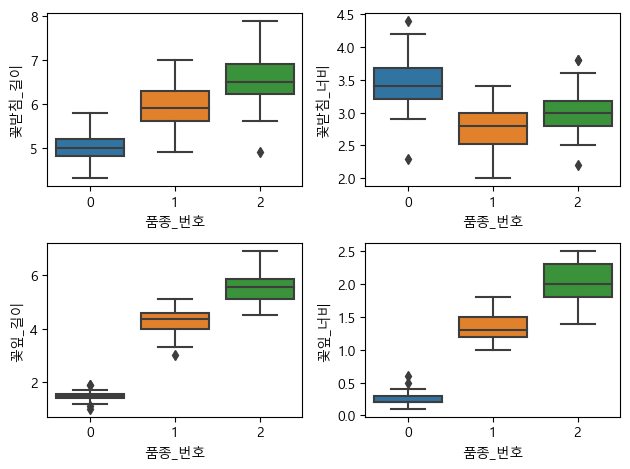

X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97368
테스트 세트의 정확도: 0.97
랜덤 포레스트 정확도: 0.9666666666666667
분류 보고서:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



c:\Users\wkwhs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


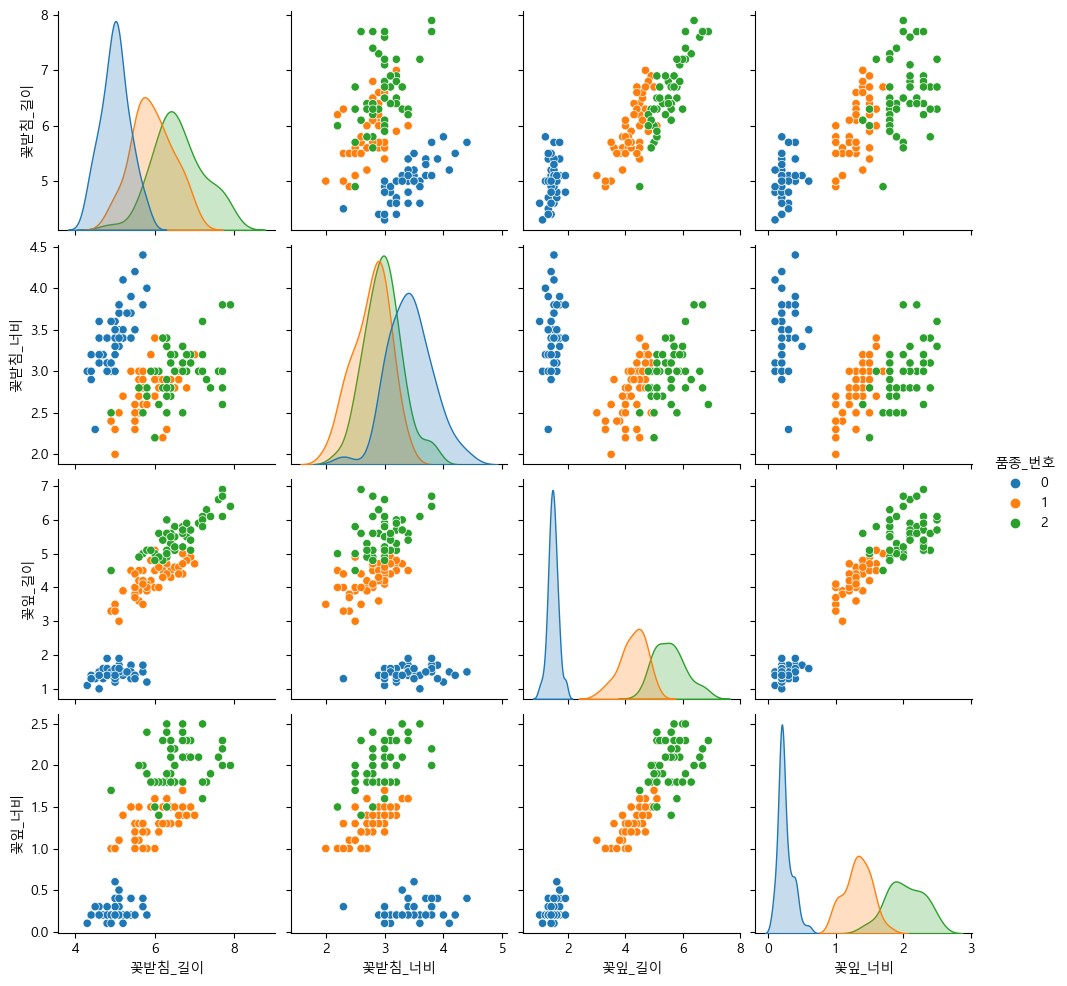

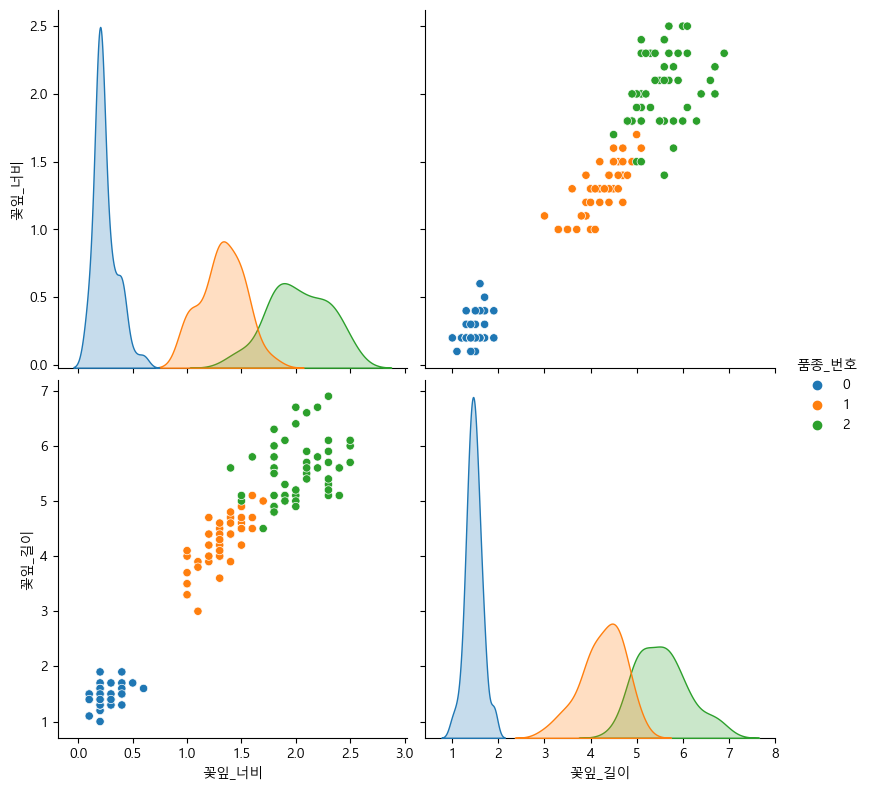

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rc('font', family='Malgun Gothic')

## 1. 데이터 불러오기 및 확인하기
iris = load_iris()

# iris 데이터의 전반적인 정보 확인
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['꽃받침_길이', '꽃받침_너비', '꽃잎_길이', '꽃잎_너비'] # column 이름 재정의
df['품종_번호'] = iris.target # 품종 번호 col 추가
df['품종_번호'] = df['품종_번호'].astype('category') # '품종_번호' 열을 카테고리 데이터로 변환
df.info()

# 이상치 확인을 위한 boxplot
plt.figure(figsize=(10, 8))
axes = plt.subplots(2,2)[1]
sn.boxplot(data=df, x='품종_번호', y='꽃받침_길이', ax=axes[0,0])
sn.boxplot(data=df, x='품종_번호', y='꽃받침_너비', ax=axes[0,1])
sn.boxplot(data=df, x='품종_번호', y='꽃잎_길이', ax=axes[1,0])
sn.boxplot(data=df, x='품종_번호', y='꽃잎_너비', ax=axes[1,1])
plt.tight_layout()
plt.show()

# 전체적으로 확인
sn.pairplot(df, hue="품종_번호")
# 꽃잎길이와 꽃잎너비
sn.pairplot(data=df, vars=["꽃잎_너비", "꽃잎_길이"], hue="품종_번호", height=4)

# k-최근접 이웃 이용
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    df, df['품종_번호'], random_state=0)

# 데이터 확인 위해 추가한 col삭제
X_train = X_train.drop('품종_번호', axis=1)
X_test = X_test.drop('품종_번호', axis=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", iris['target_names'][prediction])

y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

accuracy = np.mean(y_pred == y_test)
print("테스트 세트의 정확도: {:.5f}".format(accuracy))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

# 랜덤포레스트 이용
X_train, X_test, y_train, y_test = train_test_split(df, df['품종_번호'], test_size=0.2, stratify=df['품종_번호'], random_state=0) # random 시드값

# 데이터 확인 위해 추가한 col삭제
X_train = X_train.drop('품종_번호', axis=1)
X_test = X_test.drop('품종_번호', axis=1)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("랜덤 포레스트 정확도:", accuracy)

classification_report_result = classification_report(y_test, y_pred)
print("분류 보고서:\n", classification_report_result)